In [1]:
import pandas as pd

# Load the dataset
file_path = "./data/Historical_Contract_Data.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Supplier,Product,Contract Length,Compliance,SLA,Delivery Time (days),Base Price,Additional Fees,Total Price,Price Volatility,Delivery Risk,Contract Risk,Market Price Trends
0,Mccoy PLC,Multi-Cloud Management,24 months,HIPAA,99.9%,90,35517,3536,39053,0.090496,0.203154,0.919603,Increasing
1,Taylor PLC,AI-Powered Security,24 months,FedRAMP,99.99%,60,28046,767,28813,0.036433,0.734384,0.686250,Decreasing
2,"Gibson, Rodriguez and Wade",Cloud Optimization,12 months,ISO 27001,99.95%,45,27684,1437,29121,0.067566,0.323530,0.856653,Increasing
3,Carey-Kelly,Multi-Cloud Management,24 months,HIPAA,99.9%,30,23743,1018,24761,0.066001,0.379299,0.771665,Increasing
4,"Powell, Gibbs and Sutton",AI-Powered Security,24 months,SOC2,99.99%,45,29221,2835,32056,0.028183,0.261287,0.751372,Decreasing


In [2]:

# Step 1: Check for missing values
missing_values = df.isnull().sum()
missing_values

Supplier                0
Product                 0
Contract Length         0
Compliance              0
SLA                     0
Delivery Time (days)    0
Base Price              0
Additional Fees         0
Total Price             0
Price Volatility        0
Delivery Risk           0
Contract Risk           0
Market Price Trends     0
dtype: int64

In [3]:

# Convert 'Contract Length' from '12 months' -> 12 (int)
df['Contract Length'] = df['Contract Length'].str.extract('(\d+)').astype(int)


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\neural_ninja\AppData\Local\Temp\ipykernel_18648\408877457.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Contract Length'] = df['Contract Length'].str.extract('(\d+)').astype(int)


In [4]:
df.head()


,Supplier,Product,Contract Length,Compliance,SLA,Delivery Time (days),Base Price,Additional Fees,Total Price,Price Volatility,Delivery Risk,Contract Risk,Market Price Trends
0,Mccoy PLC,Multi-Cloud Management,24,HIPAA,99.9%,90,35517,3536,39053,0.090496,0.203154,0.919603,Increasing
1,Taylor PLC,AI-Powered Security,24,FedRAMP,99.99%,60,28046,767,28813,0.036433,0.734384,0.686250,Decreasing
2,"Gibson, Rodriguez and Wade",Cloud Optimization,12,ISO 27001,99.95%,45,27684,1437,29121,0.067566,0.323530,0.856653,Increasing
3,Carey-Kelly,Multi-Cloud Management,24,HIPAA,99.9%,30,23743,1018,24761,0.066001,0.379299,0.771665,Increasing
4,"Powell, Gibbs and Sutton",AI-Powered Security,24,SOC2,99.99%,45,29221,2835,32056,0.028183,0.261287,0.751372,Decreasing


In [5]:

# Convert 'SLA' from text to float (99.9)
df['SLA'] = df['SLA'].str.rstrip('%').astype(float)
df.head()


,Supplier,Product,Contract Length,Compliance,SLA,Delivery Time (days),Base Price,Additional Fees,Total Price,Price Volatility,Delivery Risk,Contract Risk,Market Price Trends
0,Mccoy PLC,Multi-Cloud Management,24,HIPAA,99.90,90,35517,3536,39053,0.090496,0.203154,0.919603,Increasing
1,Taylor PLC,AI-Powered Security,24,FedRAMP,99.99,60,28046,767,28813,0.036433,0.734384,0.686250,Decreasing
2,"Gibson, Rodriguez and Wade",Cloud Optimization,12,ISO 27001,99.95,45,27684,1437,29121,0.067566,0.323530,0.856653,Increasing
3,Carey-Kelly,Multi-Cloud Management,24,HIPAA,99.90,30,23743,1018,24761,0.066001,0.379299,0.771665,Increasing
4,"Powell, Gibbs and Sutton",AI-Powered Security,24,SOC2,99.99,45,29221,2835,32056,0.028183,0.261287,0.751372,Decreasing


In [6]:

# Convert 'Compliance' to binary: 1 if it has a value, 0 if 'None'
df['Compliance'] = df['Compliance'].apply(lambda x: 0 if x == "None" else 1)

# Display the updated dataframe
df.head()



,Supplier,Product,Contract Length,Compliance,SLA,Delivery Time (days),Base Price,Additional Fees,Total Price,Price Volatility,Delivery Risk,Contract Risk,Market Price Trends
0,Mccoy PLC,Multi-Cloud Management,24,1,99.90,90,35517,3536,39053,0.090496,0.203154,0.919603,Increasing
1,Taylor PLC,AI-Powered Security,24,1,99.99,60,28046,767,28813,0.036433,0.734384,0.686250,Decreasing
2,"Gibson, Rodriguez and Wade",Cloud Optimization,12,1,99.95,45,27684,1437,29121,0.067566,0.323530,0.856653,Increasing
3,Carey-Kelly,Multi-Cloud Management,24,1,99.90,30,23743,1018,24761,0.066001,0.379299,0.771665,Increasing
4,"Powell, Gibbs and Sutton",AI-Powered Security,24,1,99.99,45,29221,2835,32056,0.028183,0.261287,0.751372,Decreasing


In [7]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'Supplier' and 'Product'
label_encoders = {}

for col in ['Supplier', 'Product']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert to numeric values
    label_encoders[col] = le  # Store the encoders for inverse transformation if needed

# One-Hot Encoding for 'Market Price Trends'
df = pd.get_dummies(df, columns=['Market Price Trends'], drop_first=True)

# Display the updated dataframe
df.head()


,Supplier,Product,Contract Length,Compliance,SLA,Delivery Time (days),Base Price,Additional Fees,Total Price,Price Volatility,Delivery Risk,Contract Risk,Market Price Trends_Increasing,Market Price Trends_Stable
0,534,2,24,1,99.90,90,35517,3536,39053,0.090496,0.203154,0.919603,True,False
1,840,0,24,1,99.99,60,28046,767,28813,0.036433,0.734384,0.686250,False,False
2,285,1,12,1,99.95,45,27684,1437,29121,0.067566,0.323530,0.856653,True,False
3,117,2,24,1,99.90,30,23743,1018,24761,0.066001,0.379299,0.771665,True,False
4,681,0,24,1,99.99,45,29221,2835,32056,0.028183,0.261287,0.751372,False,False


In [9]:
# Convert boolean True/False to 1/0
df['Market Price Trends_Increasing'] = df['Market Price Trends_Increasing'].astype(int)
df['Market Price Trends_Stable'] = df['Market Price Trends_Stable'].astype(int)

# Display updated dataframe
df.head()


,Supplier,Product,Contract Length,Compliance,SLA,Delivery Time (days),Base Price,Additional Fees,Total Price,Price Volatility,Delivery Risk,Contract Risk,Market Price Trends_Increasing,Market Price Trends_Stable
0,534,2,24,1,99.90,90,35517,3536,39053,0.090496,0.203154,0.919603,1,0
1,840,0,24,1,99.99,60,28046,767,28813,0.036433,0.734384,0.686250,0,0
2,285,1,12,1,99.95,45,27684,1437,29121,0.067566,0.323530,0.856653,1,0
3,117,2,24,1,99.90,30,23743,1018,24761,0.066001,0.379299,0.771665,1,0
4,681,0,24,1,99.99,45,29221,2835,32056,0.028183,0.261287,0.751372,0,0


In [10]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]


Series([], dtype: int64)

In [11]:
# Display statistical summary
df.describe()


,Supplier,Product,Contract Length,Compliance,SLA,Delivery Time (days),Base Price,Additional Fees,Total Price,Price Volatility,Delivery Risk,Contract Risk,Market Price Trends_Increasing,Market Price Trends_Stable
count,1000.000000,1000.00000,1000.000000,1000.0,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,484.318000,0.98400,23.952000,1.0,99.94586,55.800000,26350.287000,2726.947000,29077.234000,0.075821,0.500560,0.501774,0.322000,0.352000
std,279.859118,0.80647,9.783118,0.0,0.03709,21.506337,5902.752057,1296.697817,6086.690141,0.043548,0.284921,0.287743,0.467477,0.477833
min,0.000000,0.00000,12.000000,1.0,99.90000,30.000000,15073.000000,506.000000,16168.000000,0.000383,0.000241,0.000554,0.000000,0.000000
25%,241.750000,0.00000,12.000000,1.0,99.90000,45.000000,21766.500000,1604.750000,24301.000000,0.036761,0.256952,0.253479,0.000000,0.000000
50%,482.500000,1.00000,24.000000,1.0,99.95000,60.000000,26160.500000,2656.500000,28894.000000,0.075997,0.485880,0.502731,0.000000,0.000000
75%,726.250000,2.00000,36.000000,1.0,99.99000,60.000000,30398.750000,3915.750000,33445.250000,0.113571,0.744613,0.753339,1.000000,1.000000
max,971.000000,2.00000,36.000000,1.0,99.99000,90.000000,39999.000000,4999.000000,44552.000000,0.149887,0.997321,0.999459,1.000000,1.000000


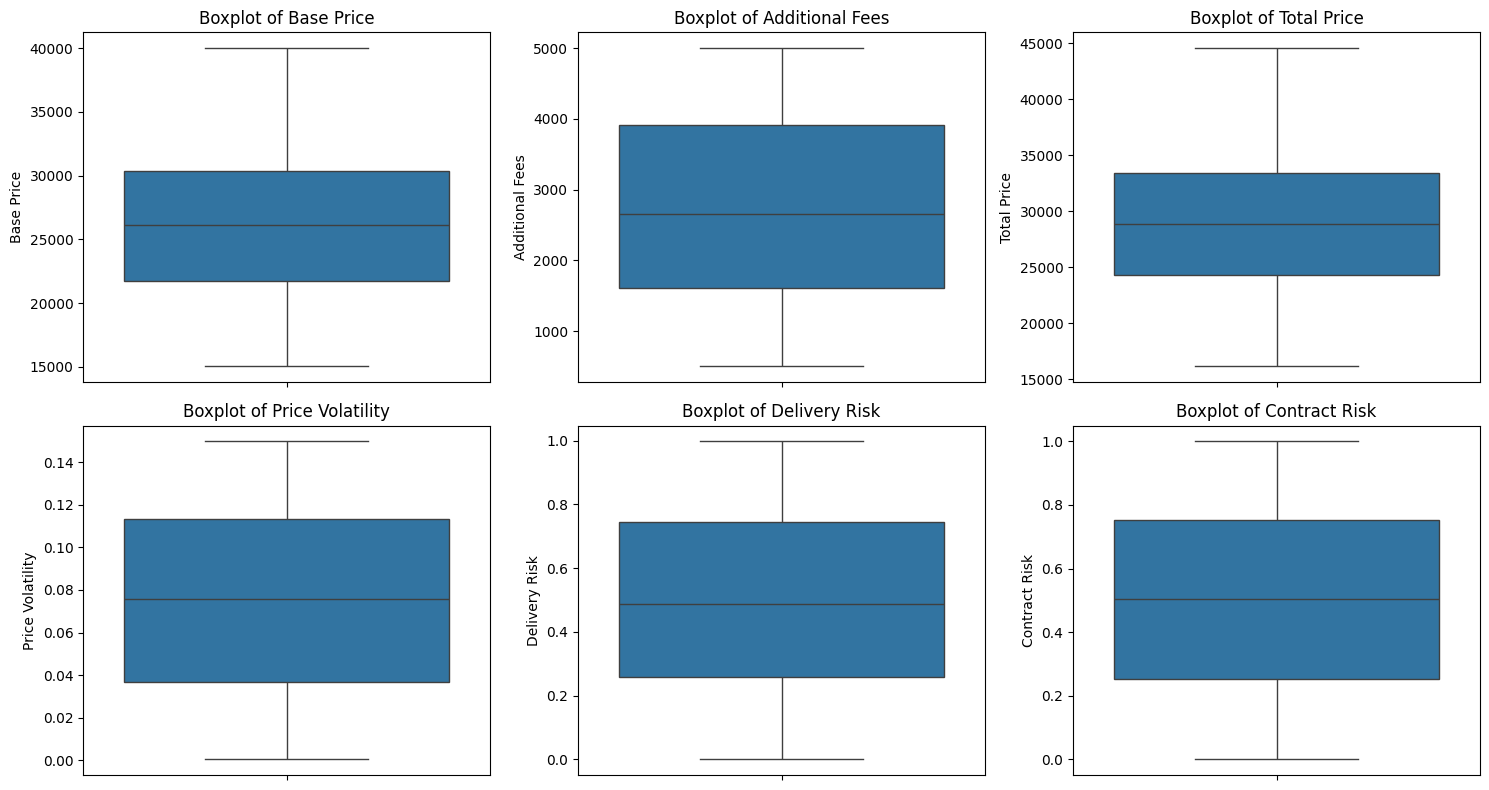

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns to check for outliers
numeric_cols = ['Base Price', 'Additional Fees', 'Total Price', 'Price Volatility', 'Delivery Risk', 'Contract Risk']

# Plot boxplots for numerical features
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define columns to apply different scalers
standardize_cols = ['Base Price', 'Additional Fees', 'Total Price']
minmax_cols = ['Price Volatility', 'Delivery Risk', 'Contract Risk']

# Apply Standard Scaler
standard_scaler = StandardScaler()
df[standardize_cols] = standard_scaler.fit_transform(df[standardize_cols])

# Apply MinMax Scaler
minmax_scaler = MinMaxScaler()
df[minmax_cols] = minmax_scaler.fit_transform(df[minmax_cols])

# Display the transformed dataset
df.head()


,Supplier,Product,Contract Length,Compliance,SLA,Delivery Time (days),Base Price,Additional Fees,Total Price,Price Volatility,Delivery Risk,Contract Risk,Market Price Trends_Increasing,Market Price Trends_Stable
0,534,2,24,1,99.90,90,1.553733,0.624246,1.639768,0.602748,0.203508,0.920057,1,0
1,840,0,24,1,99.99,60,0.287419,-1.512247,-0.043433,0.241130,0.736293,0.686447,0,0
2,285,1,12,1,99.95,45,0.226061,-0.995292,0.007194,0.449374,0.324236,0.857037,1,0
3,117,2,24,1,99.90,30,-0.441928,-1.318582,-0.709481,0.438904,0.380168,0.771956,1,0
4,681,0,24,1,99.99,45,0.486578,0.083371,0.489635,0.185951,0.261811,0.751641,0,0


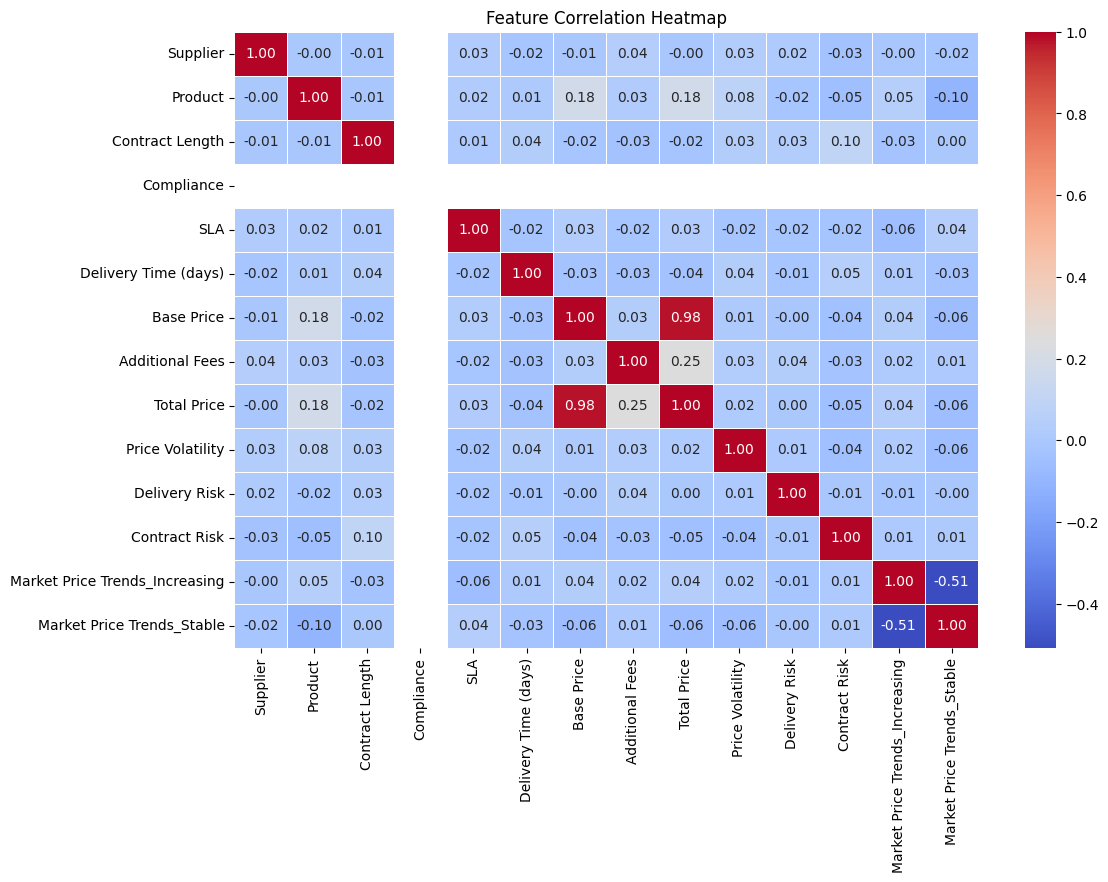

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [19]:
# Drop 'Total Price' as it is highly correlated with 'Base Price' & 'Additional Fees'
df.drop(columns=['Total Price'], inplace=True)

# Display the updated dataframe
df.head()


,Supplier,Product,Contract Length,Compliance,SLA,Delivery Time (days),Base Price,Additional Fees,Price Volatility,Delivery Risk,Contract Risk,Market Price Trends_Increasing,Market Price Trends_Stable
0,534,2,24,1,99.90,90,1.553733,0.624246,0.602748,0.203508,0.920057,1,0
1,840,0,24,1,99.99,60,0.287419,-1.512247,0.241130,0.736293,0.686447,0,0
2,285,1,12,1,99.95,45,0.226061,-0.995292,0.449374,0.324236,0.857037,1,0
3,117,2,24,1,99.90,30,-0.441928,-1.318582,0.438904,0.380168,0.771956,1,0
4,681,0,24,1,99.99,45,0.486578,0.083371,0.185951,0.261811,0.751641,0,0


In [20]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (excluding target labels)
numerical_cols = ['Base Price', 'Additional Fees', 'Contract Length', 'SLA', 
                  'Delivery Time (days)', 'Price Volatility']

# Initialize scaler
scaler = StandardScaler()

# Apply scaling to numerical features
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the updated dataframe
df.head()


,Supplier,Product,Contract Length,Compliance,SLA,Delivery Time (days),Base Price,Additional Fees,Price Volatility,Delivery Risk,Contract Risk,Market Price Trends_Increasing,Market Price Trends_Stable
0,534,2,0.004909,1,-1.237085,1.591025,1.553733,0.624246,0.337165,0.203508,0.920057,1,0
1,840,0,0.004909,1,1.190688,0.195389,0.287419,-1.512247,-0.904929,0.736293,0.686447,0,0
2,285,1,-1.222308,1,0.111678,-0.502429,0.226061,-0.995292,-0.189648,0.324236,0.857037,1,0
3,117,2,0.004909,1,-1.237085,-1.200247,-0.441928,-1.318582,-0.225609,0.380168,0.771956,1,0
4,681,0,0.004909,1,1.190688,-0.502429,0.486578,0.083371,-1.094458,0.261811,0.751641,0,0


In [21]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variables (Y)
X = df.drop(columns=['Price Volatility', 'Delivery Risk', 'Contract Risk'])  # Features
Y = df[['Price Volatility', 'Delivery Risk', 'Contract Risk']]  # Labels (Target variables)

# Split the data into 80% training and 20% testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display dataset shapes
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((800, 10), (200, 10), (800, 3), (200, 3))

In [23]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor

# Initialize XGBoost regressor with default parameters
xgb_model = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror', 
                                                   n_estimators=100, 
                                                   learning_rate=0.1, 
                                                   max_depth=5, 
                                                   random_state=42))

# Train the model on training data
xgb_model.fit(X_train, Y_train)

# Predict on test data
Y_pred = xgb_model.predict(X_test)

# Display first 5 predictions
import pandas as pd
pd.DataFrame(Y_pred, columns=['Predicted Price Volatility', 'Predicted Delivery Risk', 'Predicted Contract Risk']).head()


,Predicted Price Volatility,Predicted Delivery Risk,Predicted Contract Risk
0,-0.295115,0.468230,0.598813
1,0.381913,0.391785,0.379110
2,0.383601,0.619459,0.486109
3,0.432338,0.434227,0.536121
4,-0.111521,0.418118,0.483000


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Compute performance metrics
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

# Print results
print(f"📌 Mean Absolute Error (MAE): {mae:.5f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.5f}")
print(f"📌 R² Score: {r2:.5f}")


📌 Mean Absolute Error (MAE): 0.45425
📌 Root Mean Squared Error (RMSE): 0.62678
📌 R² Score: -0.05875
